Example: using Pandas to explore Kepler data
------------

The Kepler probe observed a patch of sky for four years looking for transit signals, evidence of planets slightly dimming these stars by passing between us and the star on their orbit.

The following example fetches the KOI (Kepler Object of Interest) table. Each row is a star that showed periodic dimming consistent with a planet in orbit around the star. However, we expect that there are a lot of false positives, so not every row corresponds to a real planet.

In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
#pd.read

In [2]:
koi = pd.read_csv('http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative')
#koi = pd.read_excel('planets.xls')

In [3]:
koi.describe()

,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_kepmag,koi_kepmag_err
count,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,...,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9563.000000,0.0
mean,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.697152,0.002149,-0.002149,166.112340,...,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,14.264606,NaN
std,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.746098,0.008237,0.008237,67.499886,...,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,1.385448,NaN
min,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,...,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,6.966000,NaN
25%,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,...,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,13.440000,NaN
50%,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.757456,0.000035,-0.000035,137.224595,...,157.000000,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,14.520000,NaN
75%,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,170.694603,...,174.000000,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,15.322000,NaN
max,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,1472.522306,...,676.000000,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,20.003000,NaN


In [4]:
koi["kepid"]

0       10797460
1       10797460
2       10811496
3       10848459
4       10854555
5       10872983
6       10872983
7       10872983
8        6721123
9       10910878
10      11446443
11      10666592
12       6922244
13      10984090
14      10419211
15      10464078
16      10480982
17      10485250
18      10526549
19      10583066
20      10583180
21      10601284
22      10601284
23      10601284
24       2306756
25      10662202
26      10682541
27      11460018
28      11463211
29      11465813
          ...   
9534     9962731
9535    12117215
9536    12168280
9537     9912977
9538     9938836
9539     9941425
9540     9959368
9541     9959765
9542    10011213
9543    10014875
9544     3954211
9545     4056579
9546     4276445
9547     4371172
9548     4557341
9549     4645492
9550     4738095
9551    10023069
9552    10028127
9553    10079317
9554    10079481
9555    10081899
9556    10199817
9557    10205598
9558    10031643
9559    10090151
9560    10128825
9561    101472

<IPython.core.display.Javascript object>


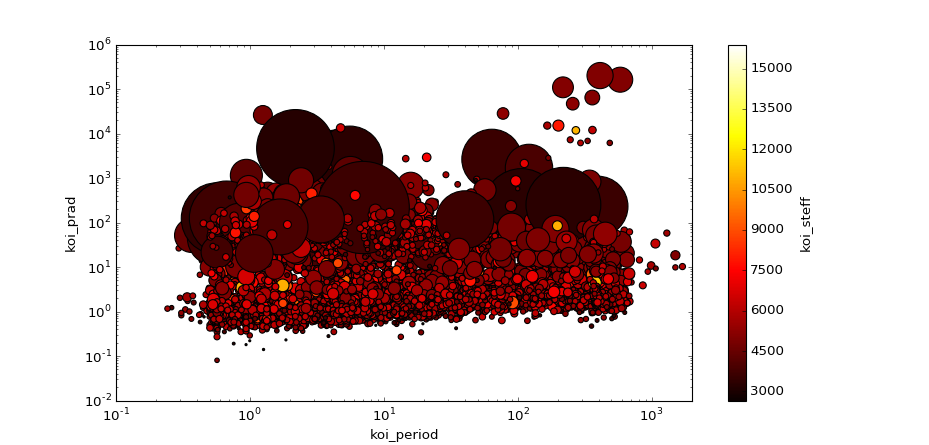

In [5]:
ax = koi.plot(x='koi_period', y='koi_prad', c='koi_steff', s=koi['koi_srad']*30, colormap=plt.cm.hot, kind='scatter', 
              figsize=(10,6), xlim=(0.1,2000), loglog=True)

In [8]:
koi['koi_steff'].describe()

count     9201.000000
mean      5706.823280
std        796.857947
min       2661.000000
25%       5310.000000
50%       5767.000000
75%       6112.000000
max      15896.000000
Name: koi_steff, dtype: float64

In [7]:
koi['koi_srad'].describe()

count    9201.000000
mean        1.728712
std         6.127185
min         0.109000
25%         0.829000
50%         1.000000
75%         1.345000
max       229.908000
Name: koi_srad, dtype: float64

In [8]:
koi.index = koi['kepid']

In [9]:
koi.iloc[42]

kepid                       11304958
kepoi_name                 K00764.01
kepler_name             Kepler-667 b
koi_disposition            CONFIRMED
koi_pdisposition           CANDIDATE
koi_score                      0.998
koi_fpflag_nt                      0
koi_fpflag_ss                      0
koi_fpflag_co                      0
koi_fpflag_ec                      0
koi_period                   41.4396
koi_period_err1            7.557e-05
koi_period_err2           -7.557e-05
koi_time0bk                  208.932
koi_time0bk_err1             0.00142
koi_time0bk_err2            -0.00142
koi_impact                     0.355
koi_impact_err1                 0.04
koi_impact_err2               -0.355
koi_duration                 10.5989
koi_duration_err1              0.088
koi_duration_err2             -0.088
koi_depth                     2793.1
koi_depth_err1                  22.6
koi_depth_err2                 -22.6
koi_prad                         5.5
koi_prad_err1                   1.57
k

In [10]:
koi.loc[11304958]

kepid                       11304958
kepoi_name                 K00764.01
kepler_name             Kepler-667 b
koi_disposition            CONFIRMED
koi_pdisposition           CANDIDATE
koi_score                      0.998
koi_fpflag_nt                      0
koi_fpflag_ss                      0
koi_fpflag_co                      0
koi_fpflag_ec                      0
koi_period                   41.4396
koi_period_err1            7.557e-05
koi_period_err2           -7.557e-05
koi_time0bk                  208.932
koi_time0bk_err1             0.00142
koi_time0bk_err2            -0.00142
koi_impact                     0.355
koi_impact_err1                 0.04
koi_impact_err2               -0.355
koi_duration                 10.5989
koi_duration_err1              0.088
koi_duration_err2             -0.088
koi_depth                     2793.1
koi_depth_err1                  22.6
koi_depth_err2                 -22.6
koi_prad                         5.5
koi_prad_err1                   1.57
k

In [11]:
koi.kepler_name.isnull()

kepid
10797460    False
10797460    False
10811496     True
10848459     True
10854555    False
10872983    False
10872983    False
10872983    False
6721123      True
10910878    False
11446443    False
10666592    False
6922244     False
10984090    False
10419211     True
10464078     True
10480982     True
10485250     True
10526549    False
10583066    False
10583180     True
10601284    False
10601284    False
10601284    False
2306756      True
10662202    False
10682541    False
11460018    False
11463211     True
11465813     True
            ...  
9962731      True
12117215     True
12168280     True
9912977      True
9938836      True
9941425      True
9959368      True
9959765      True
10011213     True
10014875     True
3954211      True
4056579      True
4276445      True
4371172      True
4557341      True
4645492      True
4738095      True
10023069     True
10028127     True
10079317     True
10079481     True
10081899     True
10199817     True
10205598     True
1003

In [12]:
output = koi.ix[koi.kepler_name.isnull() == False]

In [13]:
output

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
kepid,,,,,,,,,,,,,,,,,,,,,
10797460,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
10797460,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
10854555,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN
10872983,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,19h45m08.67s,+48d13m28.8s,15.714,NaN
10872983,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,19h45m08.67s,+48d13m28.8s,15.714,NaN
10872983,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,19h45m08.67s,+48d13m28.8s,15.714,NaN
10910878,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.485,0.083,-0.028,0.848,0.033,-0.072,19h07m59.88s,+48d22m32.8s,15.841,NaN
11446443,11446443,K00001.01,Kepler-1 b,CONFIRMED,CANDIDATE,0.811,0,0,0,0,...,4.457,0.024,-0.024,0.964,0.038,-0.038,19h07m14.03s,+49d18m59.0s,11.338,NaN
10666592,10666592,K00002.01,Kepler-2 b,CONFIRMED,CANDIDATE,1.000,0,1,0,0,...,4.019,0.033,-0.027,1.952,0.099,-0.110,19h28m59.35s,+47d58m10.3s,10.463,NaN


In [14]:
output.to_excel('planets.xls')

In [15]:
koi.ix[koi.kepoi_name == 'K00756.02']

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
kepid,,,,,,,,,,,,,,,,,,,,,
10872983,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.0,0,0,0,0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,19h45m08.67s,+48d13m28.8s,15.714,NaN


In [16]:
koi.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
kepid,,,,,,,,,,,,,,,,,,,,,
10797460,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
10797460,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
10811496,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
10848459,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
10854555,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN
